In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
bank_data = pd.read_csv("F:\\PYTHON\\ASSIGNMENTS\\LOGICAL REGRESSION\\ASSIGNMENTS\\bank-full-new.csv")

In [3]:
bank_data.head()
# All data's are accumilated in one column .

,"age,""job"",""marital"",""education"",""default"",""balance"",""housing"",""loan"",""contact"",""day"",""month"",""duration"",""campaign"",""pdays"",""previous"",""poutcome"",""y"""
0,"58,""management"",""married"",""tertiary"",""no"",2143..."
1,"44,""technician"",""single"",""secondary"",""no"",29,""..."
2,"33,""entrepreneur"",""married"",""secondary"",""no"",2..."
3,"47,""blue-collar"",""married"",""unknown"",""no"",1506..."
4,"33,""unknown"",""single"",""unknown"",""no"",1,""no"",""n..."


In [4]:
bank_details = pd.read_excel("F:\\PYTHON\\ASSIGNMENTS\\LOGICAL REGRESSION\\ASSIGNMENTS\\bank-full.xlsx")
# Using excel text to column converted csv file 

In [5]:
bank_details.head()
# We need to create model to check whether client has subscribed for term deposit or not ( y - Y variable)
# All objects needs to be converted into 

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [6]:
# Renaming 'Yes' specific to perticular column to avoid confusion while creating dummy variables.
bank_details.default.replace('yes','default_yes' ,inplace= True)
bank_details.default.replace('no','default_no' ,inplace= True)

In [7]:
bank_details.housing.replace('yes','housing_yes' ,inplace= True)
bank_details.loan.replace('yes','loan_yes' ,inplace= True)
bank_details.housing.replace('no','housing_no' ,inplace= True)
bank_details.loan.replace('no','loan_no' ,inplace= True)

In [8]:
bank_details.shape

(45211, 17)

In [9]:
bank_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 4.1+ MB


In [10]:
bank_details.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [11]:
bank_details[bank_details['balance']<0]
# Persons with negative balance.

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
25,44,admin.,married,secondary,default_no,-372,housing_yes,loan_no,unknown,5,may,172,1,-1,0,unknown,no
28,46,management,single,secondary,default_no,-246,housing_yes,loan_no,unknown,5,may,255,2,-1,0,unknown,no
36,25,blue-collar,married,secondary,default_no,-7,housing_yes,loan_no,unknown,5,may,365,1,-1,0,unknown,no
37,53,technician,married,secondary,default_no,-3,housing_no,loan_no,unknown,5,may,1666,1,-1,0,unknown,no
45,36,admin.,single,primary,default_no,-171,housing_yes,loan_no,unknown,5,may,242,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44626,31,services,single,secondary,default_no,-205,housing_no,loan_no,cellular,1,sep,481,1,579,1,failure,yes
44629,28,blue-collar,single,secondary,default_no,-46,housing_yes,loan_no,cellular,1,sep,199,1,92,14,success,yes
44836,33,blue-collar,married,primary,default_no,-195,housing_no,loan_no,unknown,20,sep,9,1,-1,0,unknown,no
44908,48,management,divorced,tertiary,default_no,-130,housing_yes,loan_no,cellular,29,sep,110,2,61,9,failure,no


In [12]:
bank_details[bank_details.duplicated()]
# No duplicates found.

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y


In [13]:
# Passing dummy variables over object data , taking only k-1 values 
marital = pd.get_dummies(bank_details['marital'] ,  drop_first=True)

In [14]:
education = pd.get_dummies(bank_details['education'] ,  drop_first=True)

In [15]:
default = pd.get_dummies(bank_details['default'] ,  drop_first=True)

In [16]:
housing = pd.get_dummies(bank_details['housing'] ,  drop_first=True)
loan = pd.get_dummies(bank_details['loan'] ,  drop_first=True)
contact = pd.get_dummies(bank_details['contact'] ,  drop_first=True)
poutcome = pd.get_dummies(bank_details['poutcome'] ,  drop_first=True)

In [17]:
# concating all variables with dummies along columns.
bank_details_cleaned = pd.concat([bank_details,marital,education,default,housing,loan,contact,poutcome] , axis = 1)

In [18]:
bank_details_cleaned
# cretae model by removing job and month

,age,job,marital,education,default,balance,housing,loan,contact,day,...,tertiary,unknown,default_yes,housing_yes,loan_yes,telephone,unknown,other,success,unknown
0,58,management,married,tertiary,default_no,2143,housing_yes,loan_no,unknown,5,...,1,0,0,1,0,0,1,0,0,1
1,44,technician,single,secondary,default_no,29,housing_yes,loan_no,unknown,5,...,0,0,0,1,0,0,1,0,0,1
2,33,entrepreneur,married,secondary,default_no,2,housing_yes,loan_yes,unknown,5,...,0,0,0,1,1,0,1,0,0,1
3,47,blue-collar,married,unknown,default_no,1506,housing_yes,loan_no,unknown,5,...,0,1,0,1,0,0,1,0,0,1
4,33,unknown,single,unknown,default_no,1,housing_no,loan_no,unknown,5,...,0,1,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,default_no,825,housing_no,loan_no,cellular,17,...,1,0,0,0,0,0,0,0,0,1
45207,71,retired,divorced,primary,default_no,1729,housing_no,loan_no,cellular,17,...,0,0,0,0,0,0,0,0,0,1
45208,72,retired,married,secondary,default_no,5715,housing_no,loan_no,cellular,17,...,0,0,0,0,0,0,0,0,1,0
45209,57,blue-collar,married,secondary,default_no,668,housing_no,loan_no,telephone,17,...,0,0,0,0,0,1,0,0,0,1


In [19]:
# Keeping all num data for model building.
bank_details_cleaned.drop(['job','marital','education','default','housing','loan','contact','month','poutcome'], axis = 1 , inplace = True)

In [21]:
bank_details_cleaned1 = pd.get_dummies(bank_details_cleaned , ['y'] ,drop_first = True)

In [22]:
bank_details_cleaned1
# Data ready for creating logistic model

,age,balance,day,duration,campaign,pdays,previous,married,single,secondary,...,unknown,default_yes,housing_yes,loan_yes,telephone,unknown,other,success,unknown,y_yes
0,58,2143,5,261,1,-1,0,1,0,0,...,0,0,1,0,0,1,0,0,1,0
1,44,29,5,151,1,-1,0,0,1,1,...,0,0,1,0,0,1,0,0,1,0
2,33,2,5,76,1,-1,0,1,0,1,...,0,0,1,1,0,1,0,0,1,0
3,47,1506,5,92,1,-1,0,1,0,0,...,1,0,1,0,0,1,0,0,1,0
4,33,1,5,198,1,-1,0,0,1,0,...,1,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,825,17,977,3,-1,0,1,0,0,...,0,0,0,0,0,0,0,0,1,1
45207,71,1729,17,456,2,-1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
45208,72,5715,17,1127,5,184,3,1,0,1,...,0,0,0,0,0,0,0,1,0,1
45209,57,668,17,508,4,-1,0,1,0,1,...,0,0,0,0,1,0,0,0,1,0


In [23]:
# dividing our input and output variables 

X = bank_details_cleaned1.iloc[ : ,0:20]   
Y = bank_details_cleaned1.iloc[ : ,20]

In [25]:
from sklearn.linear_model import LogisticRegression

In [27]:
# Fitting model 
classifier = LogisticRegression(solver = 'liblinear')
classifier.fit(X,Y)

LogisticRegression(solver='liblinear')

In [28]:
# Predicting Y using created MODEl
pred_y = classifier.predict(X)

In [30]:
df = pd.DataFrame({"Actual" : bank_details_cleaned1.y_yes , "Predicted" :  pred_y} )

In [31]:
df
# Comparing actual vs predicted values.

,Actual,Predicted
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
45206,1,1
45207,1,0
45208,1,1
45209,0,0


In [33]:
# Model Evaluation.
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y , pred_y)
print(confusion_matrix)

[[38995   927]
 [ 3576  1713]]


In [34]:
# Calculating Accuracy. ie True values / Total values.

Acuuracy = (38995+1713)/(38995+1713+927+3576)

In [35]:
# Model accuracy is 90% , model can be con as better fit for predicting "Whether the client has subscribed a term deposit or not "
Acuuracy

0.9004003450487713

In [36]:
# Alternative Check as we have majority of data in neagative side
from sklearn.metrics import classification_report
print(classification_report(Y,pred_y))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95     39922
           1       0.65      0.32      0.43      5289

    accuracy                           0.90     45211
   macro avg       0.78      0.65      0.69     45211
weighted avg       0.88      0.90      0.89     45211



In [37]:
# Inferences
# We can see from precision an f1 score , Accuracy is not that great for positive value  or True positive value( ie Model is not best suited for predicting if candidate opts to term policy)
# But Model is best fit for predicting customer will not opt for term policy (True Negarives)


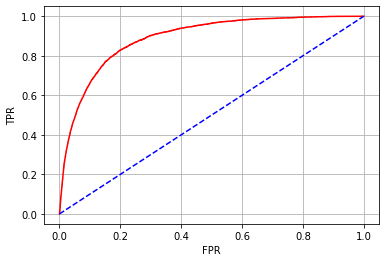

In [47]:
# ROC curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

auc = roc_auc_score(Y , pred_y)

fpr , tpr , thresh = roc_curve(Y , classifier.predict_proba(X) [: , 1]) # selecting Thresh based on positives ie > ' '.
plt.plot(fpr, tpr , color = 'red')
plt.plot([0,1],[0,1] , 'b--') # creating center line
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.grid()
plt.show()


In [48]:
# Threshold is auto calculated based on point where TPR is max and FNR is min .
# As per auc value 65% of data
auc

0.650329735440149